[0.7        0.69135802 0.68271605 0.67407407 0.6654321  0.65679012
 0.64814815 0.63950617 0.6308642  0.62222222 0.61358025 0.60493827
 0.5962963  0.58765432 0.57901235 0.57037037 0.5617284  0.55308642
 0.54444444 0.53580247 0.52716049 0.51851852 0.50987654 0.50123457
 0.49259259 0.48395062 0.47530864 0.46666667 0.45802469 0.44938272
 0.44074074 0.43209877 0.42345679 0.41481481 0.40617284 0.39753086
 0.38888889 0.38024691 0.37160494 0.36296296 0.35432099 0.34567901
 0.33703704 0.32839506 0.31975309 0.31111111 0.30246914 0.29382716
 0.28518519 0.27654321 0.26790123 0.25925926 0.25061728 0.24197531
 0.23333333 0.22469136 0.21604938 0.20740741 0.19876543 0.19012346
 0.18148148 0.17283951 0.16419753 0.15555556 0.14691358 0.1382716
 0.12962963 0.12098765 0.11234568 0.1037037  0.09506173 0.08641975
 0.07777778 0.0691358  0.06049383 0.05185185 0.04320988 0.0345679
 0.02592593 0.01728395 0.00864198 0.        ]
[0.         0.03125963 0.06251926 0.09377889 0.12503851 0.15629814
 0.18755777 0.2188

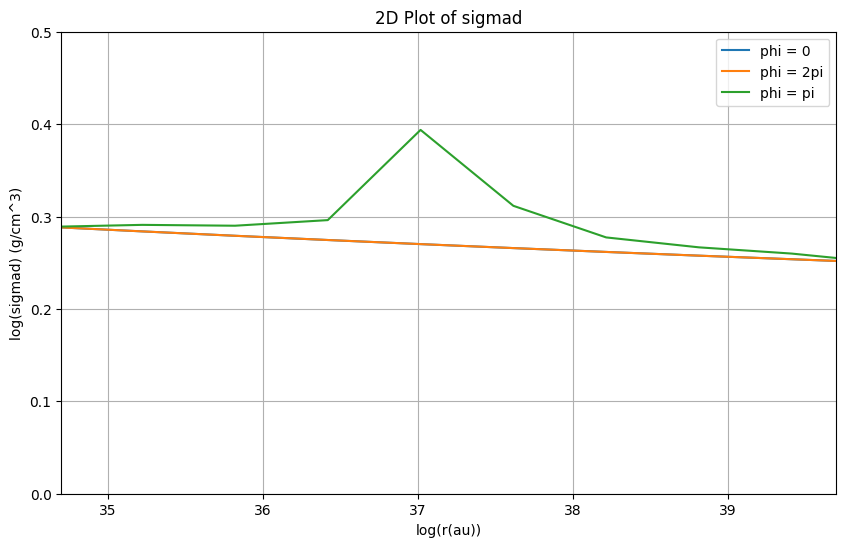

Fast (Fortran90) Mie-scattering module could not be imported. Falling back to the slower Python version.
Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
Reading dust_temperature.dat


In [1]:
import New_Model as p
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from matplotlib import cm
from radmc3dPy.image import *
from radmc3dPy.analyze import *
from radmc3dPy.natconst import *


# Read the data
#
d     = readData()  # read from all output files? idk
rr,tt = np.meshgrid(d.grid.x,d.grid.y,indexing='ij')
rrp,pp = np.meshgrid(d.grid.x,d.grid.z,indexing='ij')
 
zzr   = np.pi/2-tt


rhod  = d.rhodust[:,:,100,0]
temp  = d.dusttemp[:,:,100,0]


In [2]:
# Inspect the array informations in variable
#dtbg_mid, dtbg_sur, dtsm_mid, dtsm_sur all has size(100,200) and only have 0 value seems like
# zzr,rr,tt have size (100,32)
print('rhod.shape', rhod.shape)
print('temp.shape', temp.shape)
print(d.dusttemp.shape)
print(d.dusttemp[61,-1,0,0])
print(d.dusttemp[61,-1,100,0])
print(d.dusttemp[61,0,0,0])
print(d.dusttemp[61,0,100,0])

rhod.shape (150, 81)
temp.shape (150, 81)
(150, 81, 201, 2)
1.9617735631250577
127.91547464435307
82.77165422458437
72.96269269611706


In [3]:
print(d.grid.z)

[0.01562981 0.04688944 0.07814907 0.1094087  0.1406683  0.17192795
 0.2031876  0.2344472  0.26570685 0.2969665  0.3282261  0.3594857
 0.39074535 0.422005   0.4532646  0.48452425 0.5157839  0.5470435
 0.5783031  0.60956275 0.6408224  0.672082   0.70334165 0.7346013
 0.7658609  0.7971205  0.82838015 0.8596398  0.8908994  0.92215905
 0.9534187  0.98467825 1.015938   1.0471975  1.078457   1.109717
 1.1409765  1.172236   1.203496   1.2347555  1.266015   1.2972745
 1.328534   1.359794   1.3910535  1.422313   1.453573   1.4848325
 1.516092   1.5473515  1.578611   1.609871   1.6411305  1.67239
 1.70365    1.7349095  1.766169   1.7974285  1.828688   1.859948
 1.8912075  1.922467   1.953727   1.9849865  2.016246   2.0475055
 2.078765   2.110025   2.1412845  2.172544   2.203804   2.2350635
 2.266323   2.297583   2.3288425  2.360102   2.3913615  2.422621
 2.453881   2.4851405  2.5164     2.54766    2.5789195  2.610179
 2.6414385  2.672698   2.703958   2.7352175  2.766477   2.797737
 2.8289965  2.8

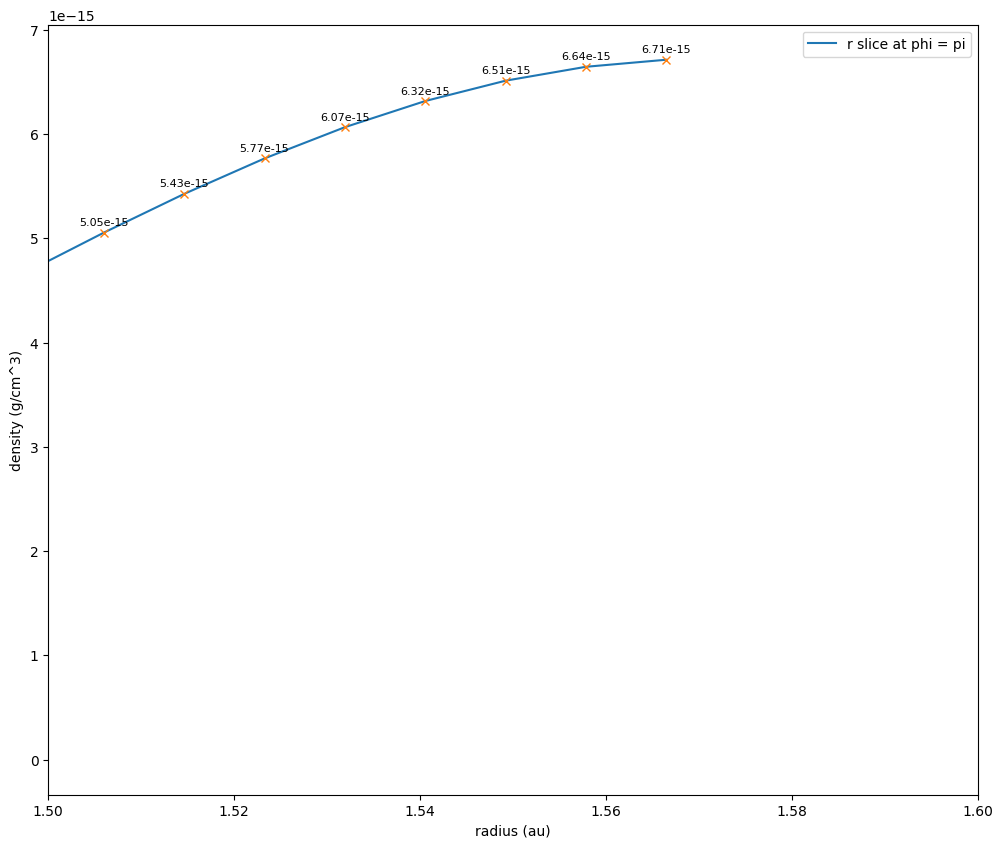

0.015071559590067824


In [4]:
plt.figure(figsize=(12,10))
plt.plot(d.grid.y, d.rhodust[61,:,100,0], '-' ,label ='r slice at phi = pi')
plt.plot(d.grid.y, d.rhodust[61,:,100,0], 'x')
for x, y in zip(d.grid.y , d.rhodust[61,:,100,0]):
    plt.annotate(f'{y:.2e}',  
                 (x, y),     
                 textcoords="offset points",  
                 xytext=(0, 5),  
                 ha='center', fontsize=8)  

plt.xlabel('radius (au)')
plt.xlim(1.5,1.6)
plt.ylabel('density (g/cm^3)')
plt.legend()
plt.show()


print(np.mean(d.grid.y)/len(d.grid.y))


# plot density at different phi


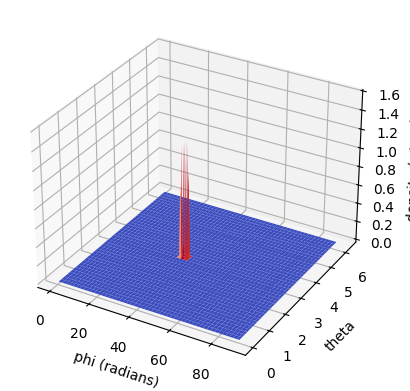

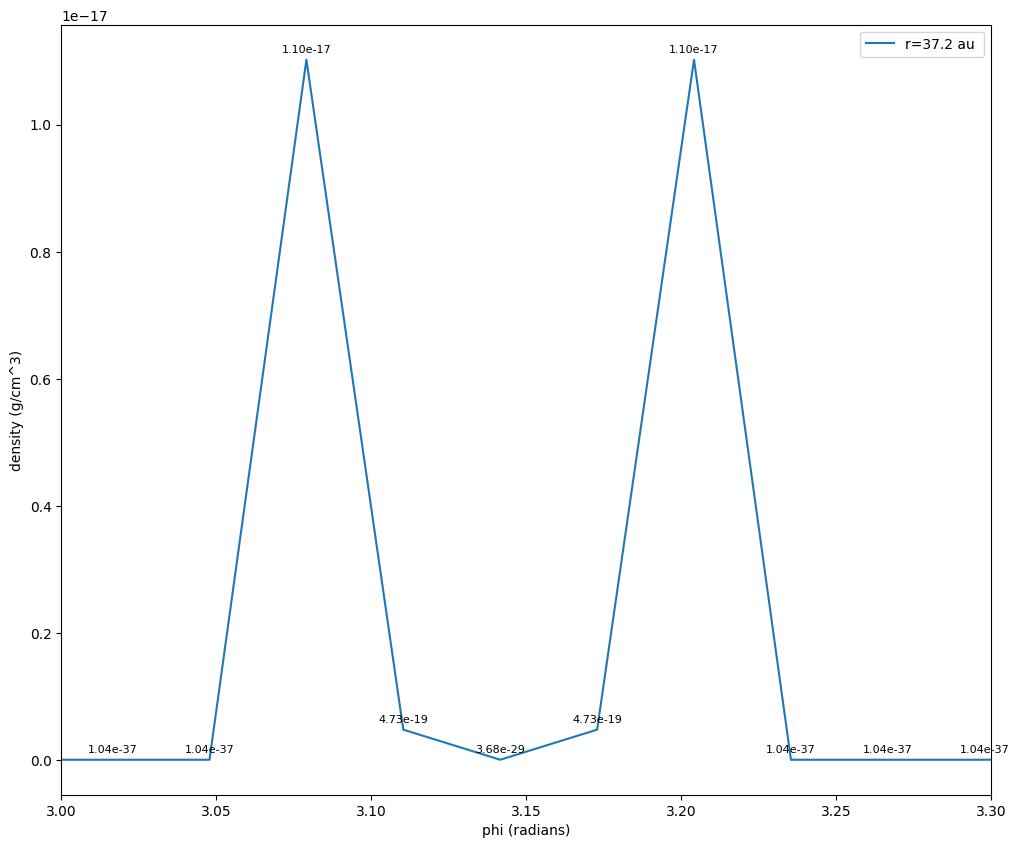

Its quite resonable that in that ring , the density is other phi-values is near zero. The two peaks might be because there are 2 pixels covering the disk?


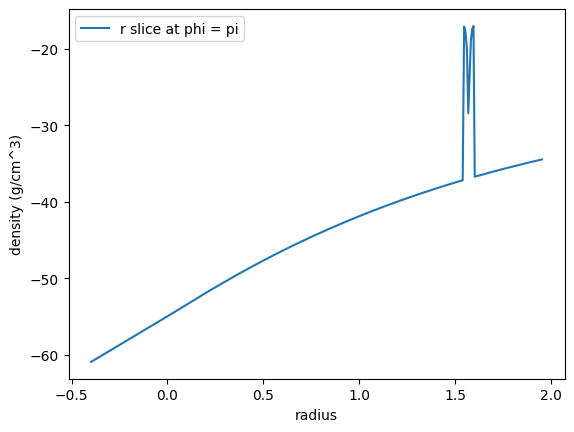

In [5]:
# plot density at different phi for a given r


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(rrp/au, pp, d.rhodust[:,0,:,0], cmap=cm.coolwarm)
ax.set_xlabel('phi (radians)')
#ax.set_xlim(55,65)
#ax.set_ylim(3.12,3.16)
ax.set_ylabel('theta')
ax.set_zlabel('density (g/cm^3)')
plt.show()

plt.figure(figsize=(12,10))
plt.plot(d.grid.z, d.rhodust[61,0,:,0],label='r=37.2 au ')

for x, y in zip(d.grid.z, d.rhodust[61,0,:,0]):
    plt.annotate(f'{y:.2e}',  
                 (x, y),     
                 textcoords="offset points",  
                 xytext=(0, 5),  
                 ha='center', fontsize=8)  

plt.xlim(3, 3.3)
plt.xlabel('phi (radians)')
plt.ylabel('density (g/cm^3)')
plt.legend()
plt.show()
print(f'Its quite resonable that in that ring , the density is other phi-values is near zero. The two peaks might be because there are 2 pixels covering the disk?')

plt.figure()
plt.plot(np.log10(d.grid.x/au), np.log10(d.rhodust[:,0,100,0]),label ='r slice at phi = pi')
plt.xlabel('radius')
plt.ylabel('density (g/cm^3)')
plt.legend()
plt.show()




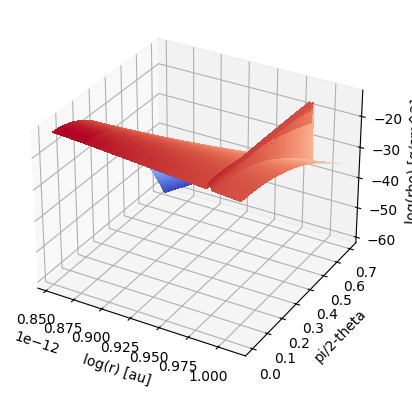

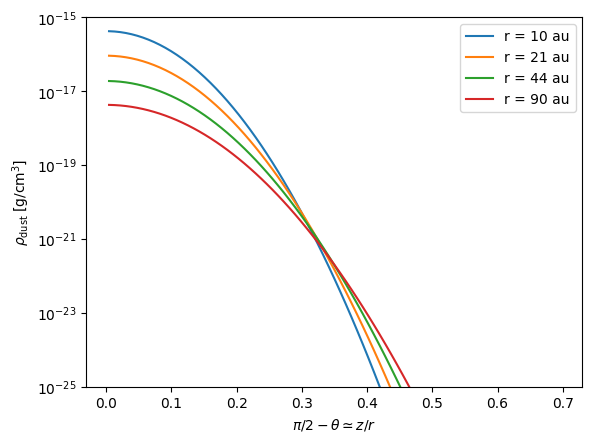

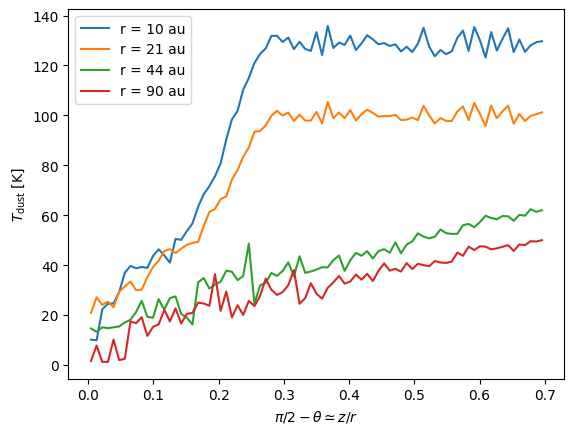

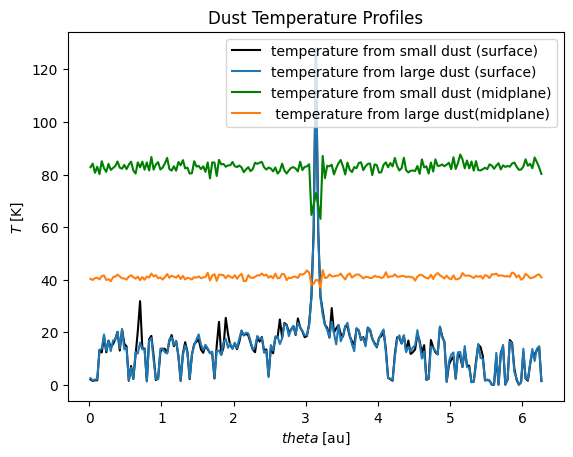

C:\Users\LHEM\AppData\Local\Temp\ipykernel_14244\1448141825.py:67: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,0]), ':', label='temperature from small dust (surface)', color='black')
C:\Users\LHEM\AppData\Local\Temp\ipykernel_14244\1448141825.py:68: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,1]), ':', label='temperature from large dust (surface)', color='C0')


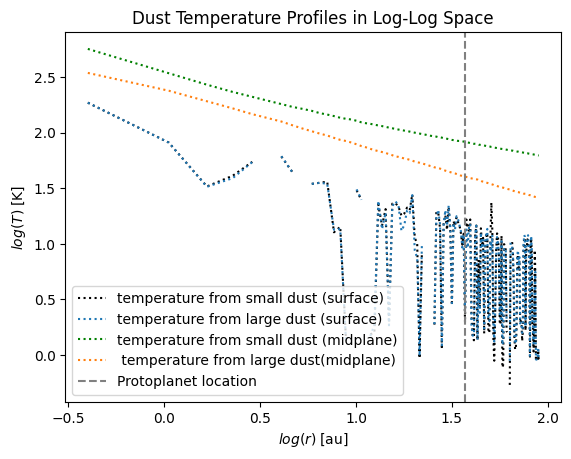

In [ ]:


#
# View a surface plot of the density structure
#
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(rr)/au, zzr, np.log10(rhod), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=False)
ax.set_xlabel('log(r) [au]')
ax.set_ylabel('pi/2-theta')
ax.set_zlabel('log(rho) [g/cm^3]')
plt.show()

#
# Set the radii where to make the following plots
#
rpl = np.array([10,21,44,90])*au   # Radii where to make the plots
irr = np.array(np.interp(rpl,d.grid.x,np.arange(len(d.grid.x)))+0.5,dtype=int)  # Nearest radial grid point

#
# Plot the vertical density structure at different radii
#
plt.figure()
for ir in irr:
    r    = d.grid.x[ir]
    rstr = '{0:4.0f}'.format(r/au)
    rstr = 'r = '+rstr.strip()+' au'
    plt.semilogy(zzr[ir,:],rhod[ir,:],label=rstr)
plt.ylim((1e-25,1e-15))
plt.xlabel(r'$\pi/2-\theta\simeq z/r$')
plt.ylabel(r'$\rho_{\mathrm{dust}}\;[\mathrm{g}/\mathrm{cm}^3]$')
plt.legend()

#
# Plot the vertical temperature structure at different radii
#
plt.figure()
for ir in irr:
    r    = d.grid.x[ir]
    rstr = '{0:4.0f}'.format(r/au)
    rstr = 'r = '+rstr.strip()+' au'
    plt.plot(zzr[ir,:],temp[ir,:],label=rstr)
plt.xlabel(r'$\pi/2-\theta\simeq z/r$')
plt.ylabel(r'$T_{\mathrm{dust}}\;[\mathrm{K}]$')
plt.legend()

#
# Plot the radial midplane and surface temperature,
# and compare to the analytic estimate
#
plt.figure()
plt.title('Dust Temperature Profiles')
plt.plot(d.grid.z, d.dusttemp[61, -1, :,0], '-', label='temperature from small dust (surface)', color='black')
plt.plot(d.grid.z, d.dusttemp[61, -1, :,1], '-', label='temperature from large dust (surface)', color='C0')
plt.plot(d.grid.z, d.dusttemp[61, 0, :,0], label='temperature from small dust (midplane)', color='green')
plt.plot(d.grid.z, d.dusttemp[61, 0, :,1], label=' temperature from large dust(midplane)', color='C1')
#plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0], '.', color='C1')
# Add a vertical line at r = 37.2 au
#plt.axvline(x=37.2, color='grey', linestyle='--', label='Protoplanet location')
plt.xlabel(r'$theta\;[\mathrm{au}]$')
plt.ylabel(r'$T\;[\mathrm{K}]$')
plt.legend()

plt.show()

# An issue: super confused with which one is mid plane, which one is surface 
plt.figure()
plt.title('Dust Temperature Profiles in Log-Log Space')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,0]), ':', label='phi = 0', color='black')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,1]), ':', label='phi = pi/2', color='C0')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 0,0]),':', label='phi = pi', color='green')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 0,1]),':', label='phi = 2pi', color='C1')
#plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0], '.', color='C1')
# Add a vertical line at r = 37.2 au
plt.axvline(x=np.log10(37.2), color='grey', linestyle='--', label='Protoplanet location')
plt.xlabel(r'$log(r)\;[\mathrm{au}]$')
plt.ylabel(r'$log(T)\;[\mathrm{K}]$')
plt.legend()

plt.show()


C:\Users\LHEM\AppData\Local\Temp\ipykernel_14244\3962157475.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,1]),  label='phi = 0 ', color='black')
C:\Users\LHEM\AppData\Local\Temp\ipykernel_14244\3962157475.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 50,1]), label='phi = pi/2', color='C0')
C:\Users\LHEM\AppData\Local\Temp\ipykernel_14244\3962157475.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 100,1]), label='phi = pi', color='green')
C:\Users\LHEM\AppData\Local\Temp\ipykernel_14244\3962157475.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, -1,1]), label=' phi = 2pi', color='C1')


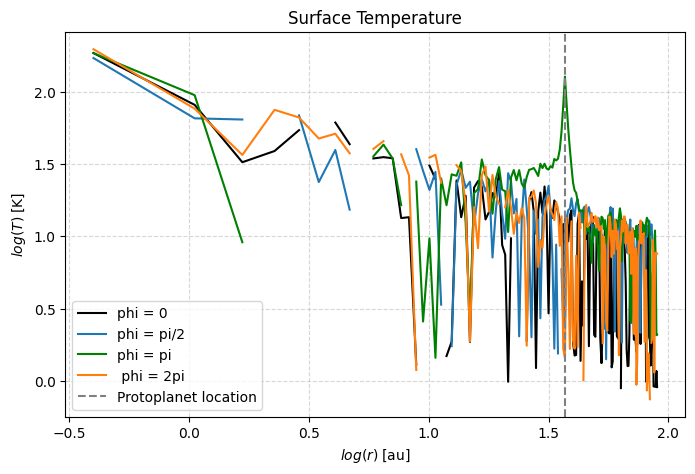

In [26]:
# An issue: super confused with which one is mid plane, which one is surface 
plt.figure( figsize=(8,5))

plt.title('Surface Temperature')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,1]),  label='phi = 0 ', color='black')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 50,1]), label='phi = pi/2', color='C0')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 100,1]), label='phi = pi', color='green')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, -1,1]), label=' phi = 2pi', color='C1')
#plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0], '.', color='C1')
# Add a vertical line at r = 37.2 au
plt.axvline(x=np.log10(37.2), color='grey', linestyle='--', label='Protoplanet location')
plt.xlabel(r'$log(r)\;[\mathrm{au}]$')
plt.ylabel(r'$log(T)\;[\mathrm{K}]$')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.show()

In [20]:
print(np.min(d.dusttemp[:, -1, 0, 0]))

0.0


<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\LHEM\AppData\Local\Temp\ipykernel_14244\1588606662.py:4: SyntaxWarning: invalid escape sequence '\p'
  fig.suptitle('Dust Temperature for $\phi = 0$', fontsize=16, y=1.02)
C:\Users\LHEM\AppData\Local\Temp\ipykernel_14244\1588606662.py:5: RuntimeWarning: divide by zero encountered in log10
  axs[0, 0].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 100, 0]), color='black')
C:\Users\LHEM\AppData\Local\Temp\ipykernel_14244\1588606662.py:14: RuntimeWarning: divide by zero encountered in log10
  axs[0, 1].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 100, 1]), color='black')


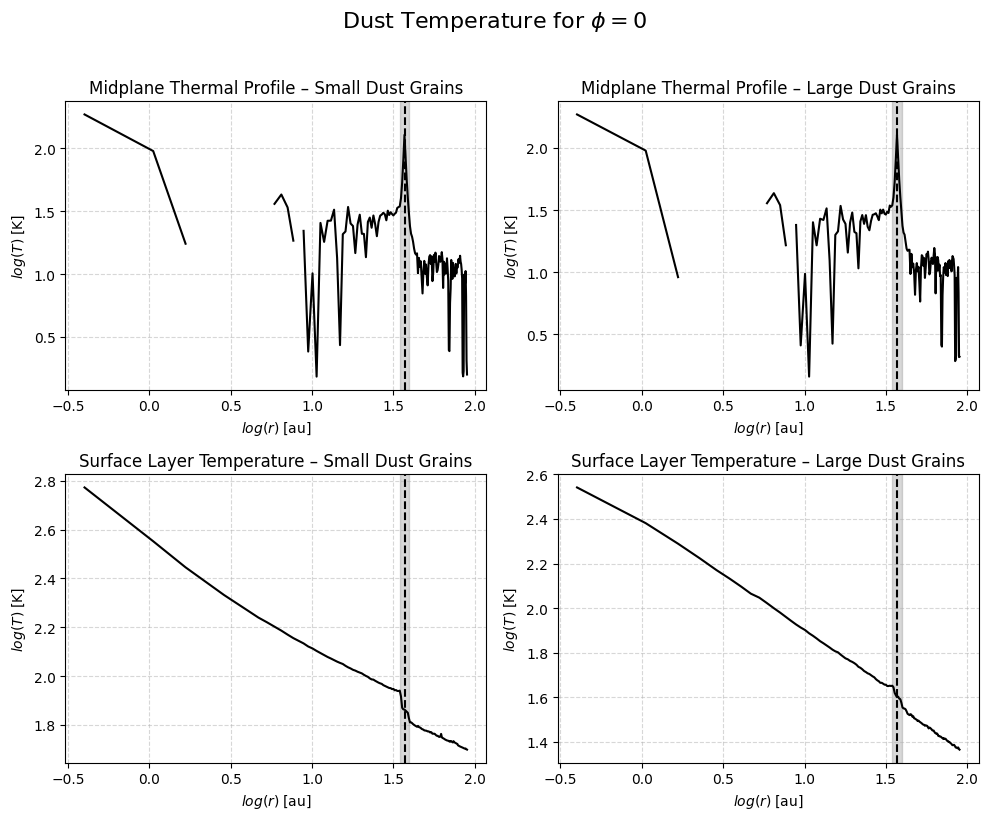

In [25]:
# Subplots of T in different theta layers
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

fig.suptitle('Dust Temperature for $\phi = 0$', fontsize=16, y=1.02)
axs[0, 0].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 100, 0]), color='black')
axs[0, 0].set_title('Midplane Thermal Profile – Small Dust Grains')
axs[0, 0].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[0, 0].set_ylabel(r'$log(T)\;[\mathrm{K}]$')
axs[0, 0].axvline(x=np.log10(37.2), color='black', linestyle='--', linewidth=1.5) 
axs[0, 0].axvspan(np.log10(37.2-2.5), np.log10(37.2+2.5), color='gray', alpha=0.3)  
axs[0, 0].grid(True, linestyle='--', alpha=0.5)


axs[0, 1].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 100, 1]), color='black')
axs[0, 1].set_title('Midplane Thermal Profile – Large Dust Grains')
axs[0, 1].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[0, 1].set_ylabel(r'$log(T)\;[\mathrm{K}]$')
axs[0, 1].axvline(x=np.log10(37.2), color='black', linestyle='--', linewidth=1.5) 
axs[0, 1].axvspan(np.log10(37.2-2.5), np.log10(37.2+2.5), color='gray', alpha=0.3)  
axs[0, 1].grid(True, linestyle='--', alpha=0.5)

axs[1, 0].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 100, 0]), color='black')
axs[1, 0].set_title('Surface Layer Temperature – Small Dust Grains')
axs[1, 0].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[1, 0].set_ylabel(r'$log(T)\;[\mathrm{K}]$')
axs[1, 0].axvline(x=np.log10(37.2), color='black', linestyle='--', linewidth=1.5) 
axs[1, 0].axvspan(np.log10(37.2-2.5), np.log10(37.2+2.5), color='gray', alpha=0.3)  
axs[1, 0].grid(True, linestyle='--', alpha=0.5)

axs[1, 1].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 100, 1]), color='black')
axs[1, 1].set_title('Surface Layer Temperature – Large Dust Grains')
axs[1, 1].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[1, 1].set_ylabel(r'$log(T)\;[\mathrm{K}]$')
axs[1, 1].axvline(x=np.log10(37.2), color='black', linestyle='--', linewidth=1.5) 
axs[1, 1].axvspan(np.log10(37.2-2.5), np.log10(37.2+2.5), color='gray', alpha=0.3)  
axs[1, 1].grid(True, linestyle='--', alpha=0.5)
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\LHEM\AppData\Local\Temp\ipykernel_14244\3385886768.py:5: RuntimeWarning: divide by zero encountered in log10
  axs[0, 0].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0, 0]), color='black')
C:\Users\LHEM\AppData\Local\Temp\ipykernel_14244\3385886768.py:11: RuntimeWarning: divide by zero encountered in log10
  axs[0, 1].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0, 1]), color='black')


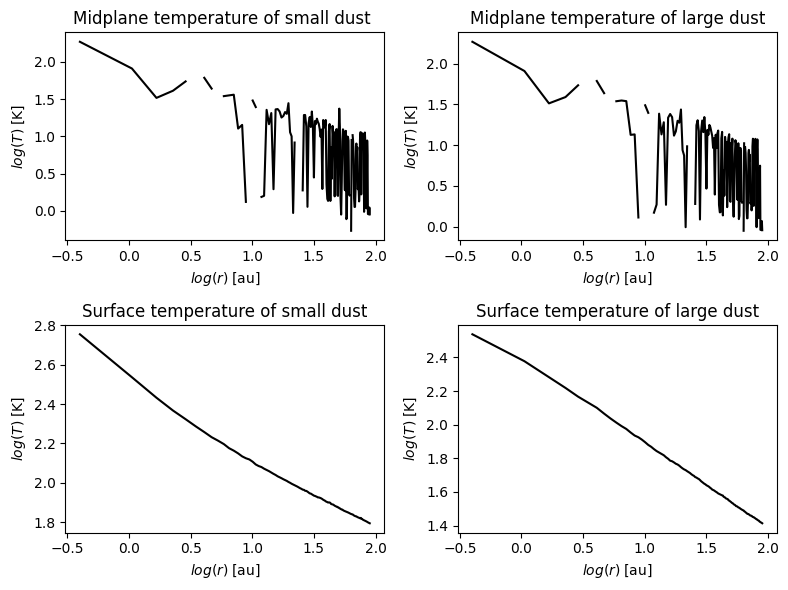

In [22]:
# Subplots of T in different theta layers
fig, axs = plt.subplots(2, 2, figsize=(8, 6))


axs[0, 0].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0, 0]), color='black')
axs[0, 0].set_title('Midplane temperature of small dust ')
axs[0, 0].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[0, 0].set_ylabel(r'$log(T)\;[\mathrm{K}]$')


axs[0, 1].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0, 1]), color='black')
axs[0, 1].set_title('Midplane temperature of large dust')
axs[0, 1].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[0, 1].set_ylabel(r'$log(T)\;[\mathrm{K}]$')

axs[1, 0].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 0, 0]), color='black')
axs[1, 0].set_title('Surface temperature of small dust')
axs[1, 0].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[1, 0].set_ylabel(r'$log(T)\;[\mathrm{K}]$')


axs[1, 1].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 0, 1]), color='black')
axs[1, 1].set_title('Surface temperature of large dust')
axs[1, 1].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[1, 1].set_ylabel(r'$log(T)\;[\mathrm{K}]$')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [23]:
# How temperature changes with z for a given drop r
#I thi
print(d.dusttemp[20, :, 0,0])

[118.0093101  121.20114535 117.75833302 123.10404835 122.94885276
 116.00142928 117.91557037 121.93002101 120.49535187 120.91109253
 121.76559804 116.54997171 119.4491848  123.19885022 116.82193941
 117.23798367 119.73872308 116.52944841 116.78869827 119.15798835
 118.18390552 119.70249073 115.26165125 118.32167607 116.63991477
 118.80470678 120.08666069 121.22840995 122.47400513 116.11772333
 117.23680311 125.32459708 120.53336894 118.90091262 120.86752759
 115.84326893 119.62761698 118.35392657 117.59179958 122.19601568
 124.07794726 119.39494056 119.17208181 117.1930442  119.2287404
 117.00702758 122.01173029 116.35985971 120.12209389 114.79298842
 113.52969347 108.83668894 110.91179543 100.84330956  95.82832233
  87.07465578  83.38012736  78.02628045  67.47961346  63.06379343
  59.76011977  56.07379427  52.79548174  52.05436396  51.34101818
  50.70286354  43.86557052  46.33718912  38.90955235  39.71085169
  36.4337038   34.99708169  32.49509108  33.03742889  32.27404645
  25.738678

The shape of x is (150, 201)
The shape of y is (150, 201)


C:\Users\LHEM\AppData\Local\Temp\ipykernel_14244\152280388.py:21: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, dtsm_sur, shading='auto', cmap='viridis')


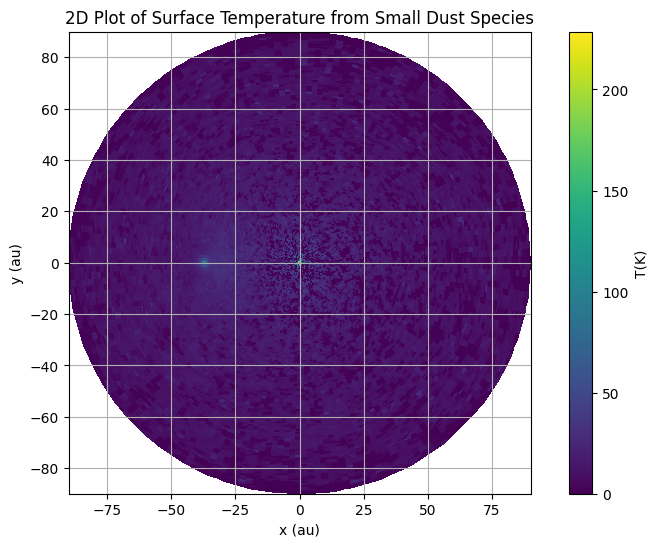

C:\Users\LHEM\AppData\Local\Temp\ipykernel_14244\152280388.py:31: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, dtsm_mid, shading='auto', cmap='viridis')


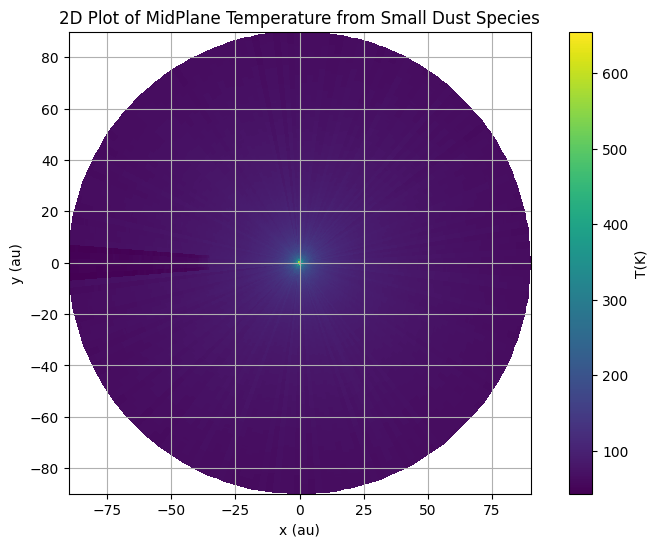

C:\Users\LHEM\AppData\Local\Temp\ipykernel_14244\152280388.py:42: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, dtbg_sur, shading='auto', cmap='viridis')


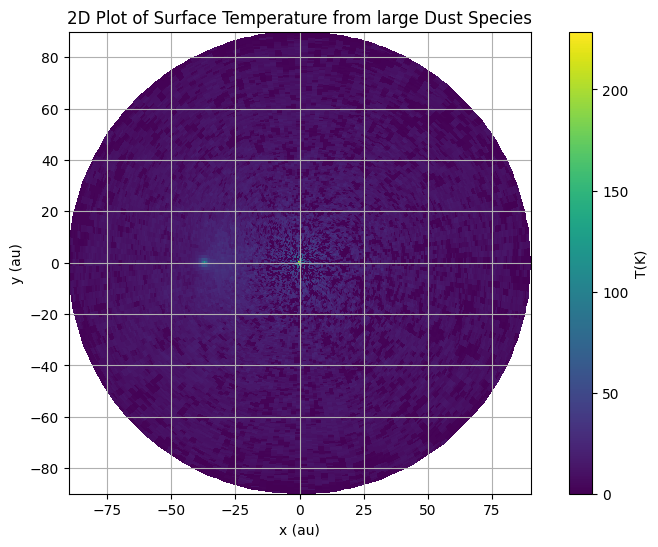

C:\Users\LHEM\AppData\Local\Temp\ipykernel_14244\152280388.py:53: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, dtbg_mid, shading='auto', cmap='viridis')


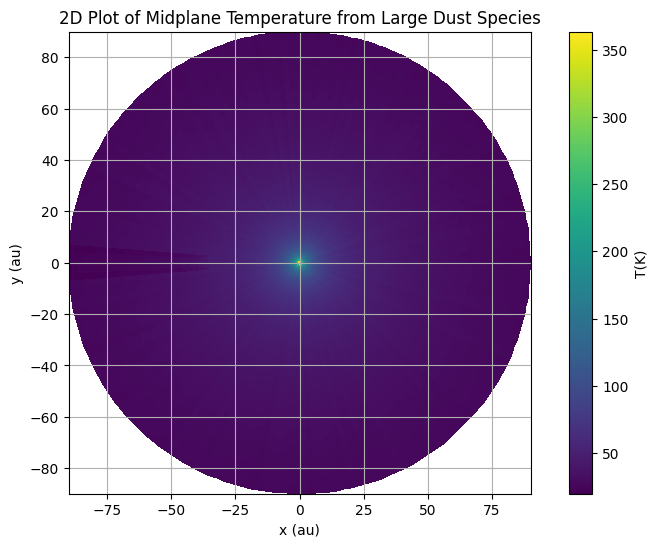

In [24]:
#2D plot of the temperature

dtsm_sur = d.dusttemp[:, -1, :,0] # surface rom the small dust specdies
dtsm_mid = d.dusttemp[:, 0, :,0] # surface rom the small dust specdies
dtbg_sur = d.dusttemp[:, -1, :,1] # surface rom the large dust specdies
dtbg_mid = d.dusttemp[:, 0, :,1] # surface rom the large dust specdies


# Create 2D grids for r and phi
r_grid, phi_grid = np.meshgrid(d.grid.x, d.grid.z, indexing='ij')

# Convert polar coordinates (r, phi) to Cartesian coordinates (x, y)
x = r_grid * np.cos(phi_grid)
y = r_grid * np.sin(phi_grid)
print(f'The shape of x is {np.shape(x)}')
print(f'The shape of y is {np.shape(y)}')



plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtsm_sur, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of Surface Temperature from Small Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtsm_mid, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of MidPlane Temperature from Small Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtbg_sur, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of Surface Temperature from large Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtbg_mid, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of Midplane Temperature from Large Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()

# Plot opacity

Reading dustkappa_0.1_micron.inp
Reading dustkappa_100_micron.inp


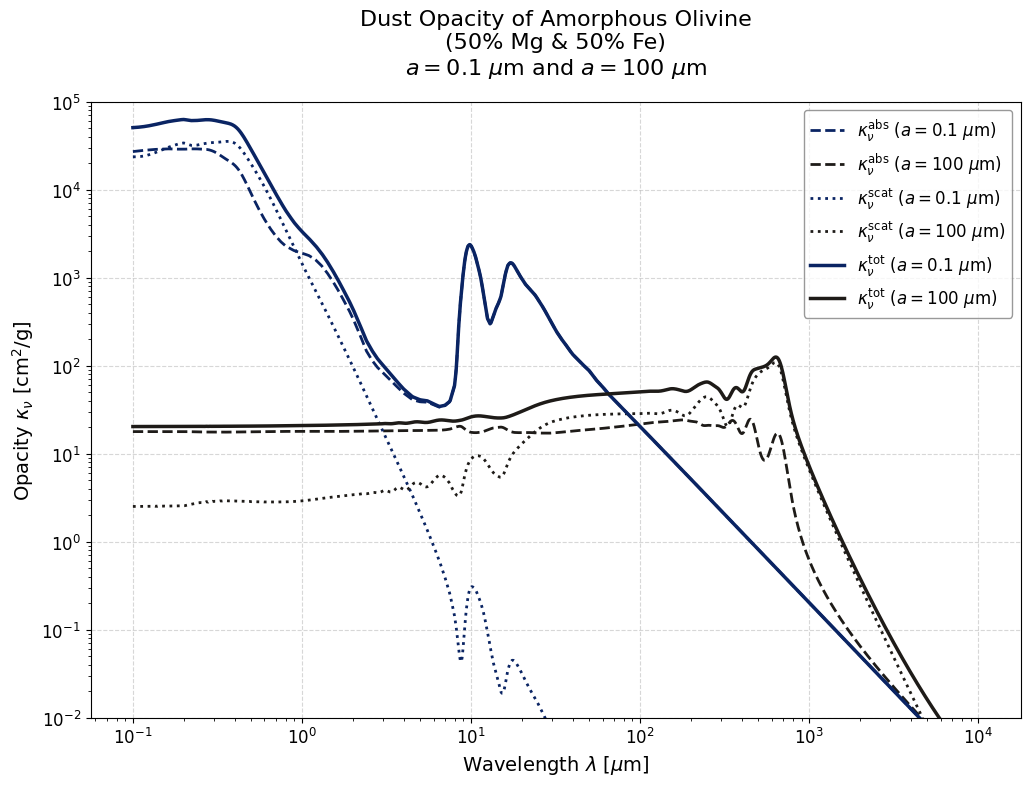

In [13]:

# Read opacity data
o1 = readOpac(ext='0.1_micron')
o2 = readOpac(ext='100_micron')

# Create figure with improved size
plt.figure(figsize=(12, 8))

# Plot absorption opacity
plt.loglog(o1.wav[0], o1.kabs[0], '--', label=r'$\kappa_\nu^{\mathrm{abs}}$ ($a = 0.1\ \mu$m)', color='#0a2463', linewidth=2)
plt.loglog(o2.wav[0], o2.kabs[0], '--', label=r'$\kappa_\nu^{\mathrm{abs}}$ ($a = 100\ \mu$m)', color='#1e1b18', linewidth=2)

# Plot scattering opacity
plt.loglog(o1.wav[0], o1.ksca[0], ':', label=r'$\kappa_\nu^{\mathrm{scat}}$ ($a = 0.1\ \mu$m)', color='#0a2463', linewidth=2)
plt.loglog(o2.wav[0], o2.ksca[0], ':', label=r'$\kappa_\nu^{\mathrm{scat}}$ ($a = 100\ \mu$m)', color='#1e1b18', linewidth=2)

# Plot total opacity
plt.loglog(o1.wav[0], o1.kabs[0] + o1.ksca[0], '-', label=r'$\kappa_\nu^{\mathrm{tot}}$ ($a = 0.1\ \mu$m)', color='#0a2463', linewidth=2.5)
plt.loglog(o2.wav[0], o2.kabs[0] + o2.ksca[0], '-', label=r'$\kappa_\nu^{\mathrm{tot}}$ ($a = 100\ \mu$m)', color='#1e1b18', linewidth=2.5)

# Set axis labels
plt.xlabel(r'Wavelength $\lambda$ [$\mu$m]', fontsize=14)
plt.ylabel(r'Opacity $\kappa_\nu$ [cm$^2$/g]', fontsize=14)

# Title with proper formatting
#plt.title(r'Dust Opacity (Amorphous Olivine (50% Mg & 50% Fe), $a = 0.1$ and $100\ \mu$m)', fontsize=15, pad=15)

plt.title(
    r'Dust Opacity of Amorphous Olivine' '\n'
    r'(50% Mg & 50% Fe)' '\n'
    r'$a = 0.1\ \mu$m and $a = 100\ \mu$m',
    fontsize=16,  # Slightly larger font size
    pad=20,       # Increase padding for better spacing
    loc='center'  # Center-align the title
)


# Set log scale limits
plt.ylim(1e-2, 1e5)

# Improve grid appearance
plt.grid(True, linestyle='--', alpha=0.5)

# Customize tick label sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


#Bandfrequencies = np.array('')

#for freq, name in zip(Bandfrequencies, Bandname):
##    ax2.annotate(name, xy=(freq, 1e-14), xytext=(freq + 5, 1e-14),
#                 rotation=90, verticalalignment='center', color='blue')
    



# Add legend with proper positioning
plt.legend(loc='best', fontsize=12, frameon=True, edgecolor='gray')


# Show the plot
plt.show()

In [14]:
# Plot the optical depth
# adapted from plot_structure.py in the radmc3d github of run_ppdisk_fargo3d_1_axisymm


sig_d   = []  # store the dust surface densities
opacs   = []  # stores opacity for different dust species

# I have dustopac.inp and dustkappa.inp, don't have dustkapscatmat.inp
# I HAVE scattering opacity, but treated in just the Henyey-Greenstein non-polarized way, not the more realistic 

# I dont think I can do the polarization I need to change the dustkapp to dustscatkappa
with open('dustopac.inp','r') as f:   
    str=f.readline()
    str=f.readline()
    str=f.readline()
    for i in range(d.rhodust.shape[-1]):
        d.getSigmaDust(i)
        sig_d.append(d.sigmadust)   # reads the surface density of the dust species
        str=f.readline()
        str=f.readline()
        str=f.readline()
        ext=str.split()[0]
        o=readOpac(ext=ext,scatmat=False)  # I dont see this .ext entension
        opacs.append(o)
        str=f.readline()
        
values = [7500, 3000, 2000, 1621.62, 1304.35, 869.57, 652.17, 461.54, 344.83]

# Convert to a NumPy array
values_array = np.array(values)
taus    = []
for lam in values_array:
    kappas = []
    for o in opacs:
        kap = np.interp(lam,o.wav[0],o.kabs[0]+o.ksca[0]) # for each awvelength,interpolate the absorption and scattering opacity
        kappas.append(kap)
    tau = np.zeros((len(opacs),d.grid.nx,d.grid.nz))  # initialise the tau (optical depth array)
    for i,s in zip(np.arange(len(sig_d)),sig_d):
        tau[i,:,:] = s*kappas[i]   # tao is the product of surface density and opacity # stacked vertcial already
    taus.append(tau)


# Is kappa per mass of per volume?
# Write the formula for this 
# gcm^-2 (sigmad) * cm^2g^-1 (kappa)?



Reading dustkappa_0.1_micron.inp
Reading dustkappa_100_micron.inp


In [15]:
print(np.shape(d.rhodust))
print(d.rhodust.shape[-1])
print(np.shape(taus))
print(d.grid.nz)

(150, 81, 201, 2)
2
(9, 2, 150, 201)
201


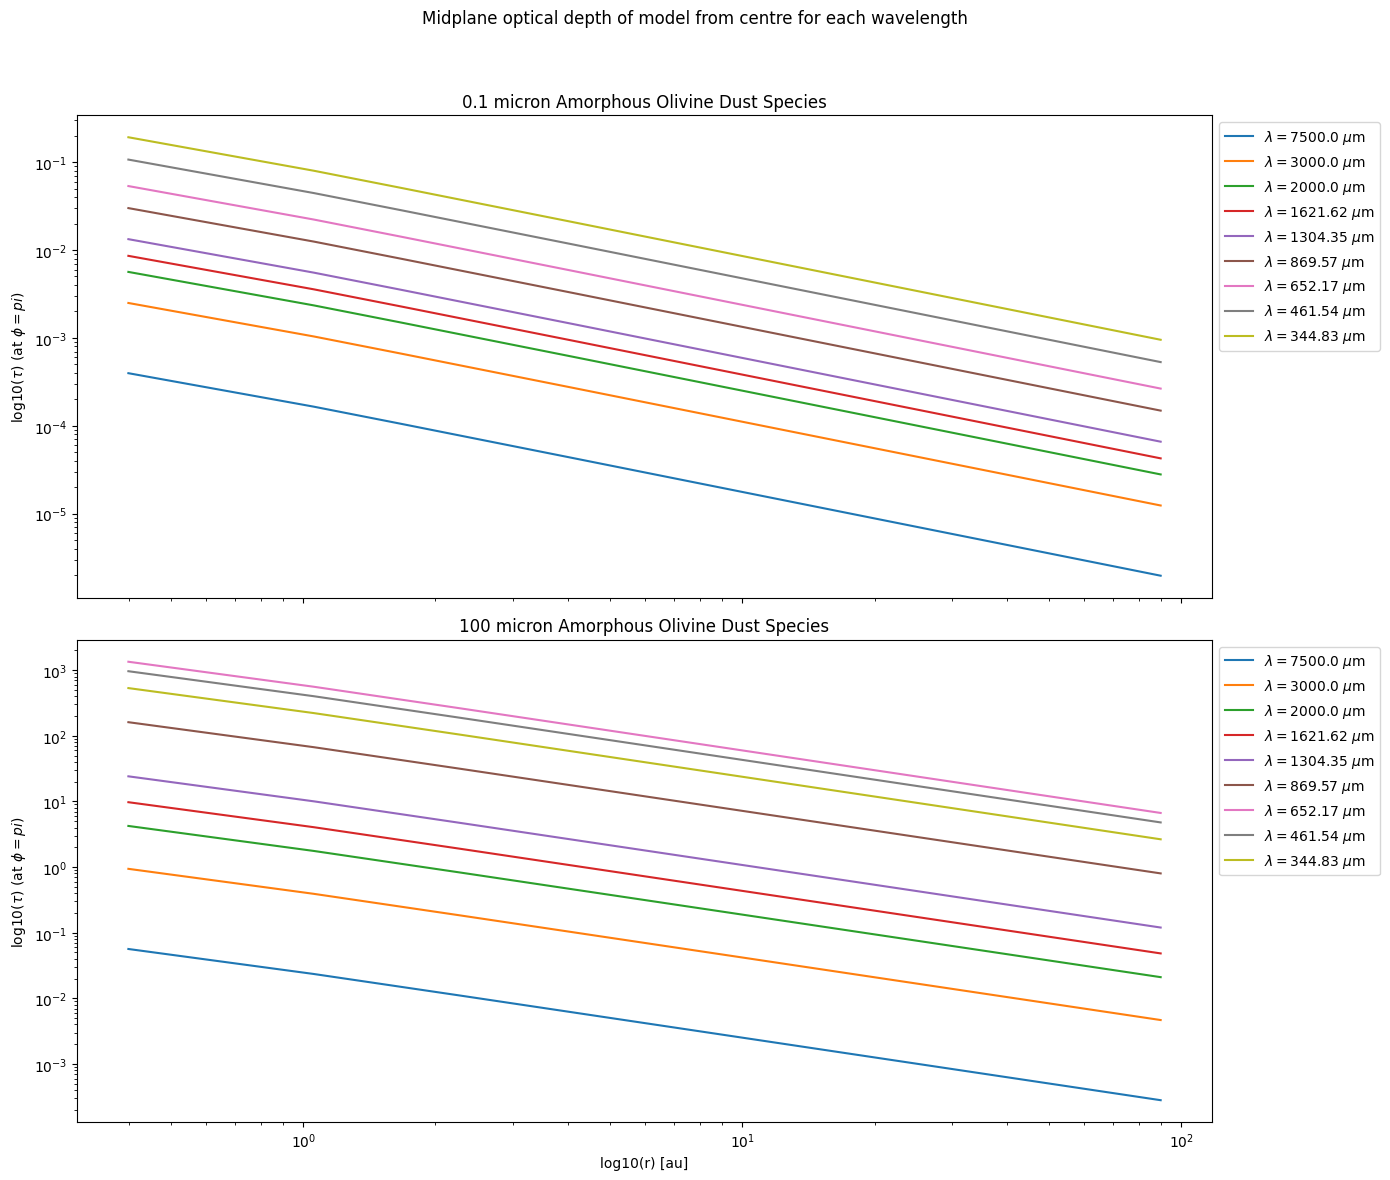

In [16]:

fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)  # Two subplots (1 row, 2 columns)

fig.suptitle('Midplane optical depth of model from centre for each wavelength')
sizelabel = ['0.1 micron','100 micron']
for i in range(len(opacs)):  # Iterate over species
    ax = axes[i]  
    for lam, tau in zip(values_array, taus):
        ax.loglog(d.grid.x / au, tau[i][:, 0],  # phi is 0
                  label=r'$\lambda={}$'.format(lam) + r' $\mu\mathrm{m}$')
    if i ==  1:
        ax.set_xlabel('log10(r) [au]')
    ax.set_ylabel(r'log10($\tau$) (at $\phi=pi$)')  # Only label y-axis for the first subplot
    ax.set_title(f'{sizelabel[i]} Amorphous Olivine Dust Species')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()

In [17]:
phi_max = np.arctan(1/37.2) # Azimuthal range of the CPD region
phi_min = 2*np.pi - phi_max

print(phi_max, phi_min)

0.02687524808475684 6.2563100590948295


In [18]:

# plot the density

lgrin  = np.log10(a.grid.x[0]/au)
lgrout = np.log10(a.grid.x[-1]/au)
plt.figure()
plt.imshow(np.log10(a.rhodust[:,:,0,0].T),extent=[lgrin,lgrout,0,np.pi/2-a.grid.y[0]],aspect='auto',cmap=cm.Blues)
plt.xlabel(r'$^{10}\log(r)\; [\mathrm{AU}]$')
plt.ylabel(r'$\pi/2-\theta$')
cbar=plt.colorbar()
cbar.set_label(r'$^{10}\log(\rho)\;[\mathrm{g}/\mathrm{cm}^3]$')
plt.show()

NameError: name 'a' is not defined